In [1]:
from LoopStructural import GeologicalModel
from LoopStructural.visualisation import LavaVuModelViewer
from LoopStructural.datasets import normal_vector_headers
from LoopStructural.datasets import value_headers
import numpy as np
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt

In [2]:
dfs = []
for f in glob.glob('data/noddy_synth/*.csv'):
    print(f)#dfs.append(data[os.path.basename(f)] = np.loadtxt(f,delimiter=" ")


data/noddy_synth/s1_val.csv
data/noddy_synth/s1_dir.csv
data/noddy_synth/s0_val.csv
data/noddy_synth/s2_dir.csv
data/noddy_synth/s0_dir.csv
data/noddy_synth/s2_val.csv


In [3]:
dfs.append(pd.DataFrame(np.loadtxt('data/noddy_synth/s1_dir.csv',delimiter=" "),columns=normal_vector_headers()))
dfs[-1]['type'] = 's1'
dfs.append(pd.DataFrame(np.loadtxt('data/noddy_synth/s0_dir.csv',delimiter=" "),columns=normal_vector_headers()))
dfs[-1]['type'] = 's0'
dfs.append(pd.DataFrame(np.loadtxt('data/noddy_synth/s2_dir.csv',delimiter=" "),columns=normal_vector_headers()))
dfs[-1]['type'] = 's2'
print(dfs[-1])
# dfs.append(pd.DataFrame(np.loadtxt('data/noddy_synth/s1_val.csv',delimiter=" "),columns=value_headers()))
# dfs[-1]['type'] = 's1'
# dfs.append(pd.DataFrame(np.loadtxt('data/noddy_synth/s0_val.csv',delimiter=" "),columns=value_headers()))
# dfs[-1]['type'] = 's0'
# dfs.append(pd.DataFrame(np.loadtxt('data/noddy_synth/s2_val.csv',delimiter=" "),columns=value_headers()))
# dfs[-1]['type'] = 's2'

             X            Y            Z        nx        ny        nz type
0  4823.496582  5576.529297  3652.300781  0.999869  0.008587  0.013755   s2
1  4509.626953  7308.625000  3793.699219  0.999753 -0.022182  0.001305   s2
2  6904.334473  6378.640625  3828.726563  0.999275 -0.036587 -0.010550   s2
3  8717.802734  5402.157227  4271.781250  0.998713  0.032723 -0.038755   s2
4  6485.542480  1681.788940  4266.632813  0.999788  0.019579  0.006339   s2
5  7817.476074  2067.795166  4299.859375  0.999597 -0.027851  0.005413   s2
6  2996.549805  3739.016357  3479.988281  0.999855  0.005633  0.016068   s2
7  2894.746094  3217.271973  3423.878906  0.999659  0.025509  0.005496   s2
8  2114.250000  2670.076172  3580.832031  0.998758  0.045024 -0.021359   s2


In [4]:
value_headers()

['X', 'Y', 'Z', 'val']

In [5]:
np.loadtxt('data/noddy_synth/s2_val.csv',delimiter=" ")

array([4723.504395, 4748.135254, 3588.621094,    0.      ])

In [6]:
dfs.append(pd.DataFrame(np.loadtxt('data/noddy_synth/s1_val.csv',delimiter=" "),columns=value_headers()))
dfs[-1]['type'] = 's1'
dfs.append(pd.DataFrame(np.loadtxt('data/noddy_synth/s0_val.csv',delimiter=" "),columns=value_headers()))
dfs[-1]['type'] = 's0'
dfs.append(pd.DataFrame([np.loadtxt('data/noddy_synth/s2_val.csv',delimiter=" ")],columns=value_headers()))
dfs[-1]['type'] = 's2'

In [7]:
data = pd.concat(dfs)
origin = (0,0,0)
maximum = (10000,10000,5000)

/home/lgrose/python_env/LoopStructural/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [8]:
model = GeologicalModel(origin,maximum)
model.set_model_data(data)
s2 = model.create_and_add_fold_frame('s2',
                                     nelements=10000)
s1 = model.create_and_add_folded_fold_frame('s1',
#                                             limb_wl=.5, 
                                            av_fold_axis=True,
                                            nelements=50000
                                           )

s0 = model.create_and_add_folded_fold_frame('s0',
                                            s1['feature'],
#                                             limb_wl=1,
                                            av_fold_axis=True,
                                            nelements=50000
                                           )

[0.38487473 1.1378905 ]
[0.         0.         0.         0.38487473]
53631
[0.64516113 0.        ]
[0.         0.         0.         0.64516113]
53631


/home/lgrose/python_env/LoopStructural/lib/python3.6/site-packages/pyamg/krylov/_cg.py:140: UserWarning: 
Indefinite matrix detected in CG, aborting

  warn("\nIndefinite matrix detected in CG, aborting\n")
/home/lgrose/python_env/LoopStructural/lib/python3.6/site-packages/pyamg/krylov/_cg.py:155: UserWarning: 
Indefinite preconditioner detected in CG, aborting

  warn("\nIndefinite preconditioner detected in CG, aborting\n")



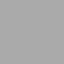

In [9]:
viewer = LavaVuModelViewer(model)
viewer.add_isosurface(s2['feature'][0])
viewer.add_data(s2['feature'][0])

viewer.add_isosurface(s1['feature'][0])
viewer.add_isosurface(s0['feature'][0])

viewer.interactive()

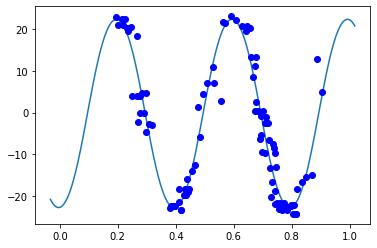

In [10]:
x = np.linspace(s2['feature'][0].min(),s2['feature'][0].max(),1000)
plt.plot(x,s1['fold'].fold_limb_rotation(x))
plt.plot(s1['foliation'],s1['limb_rotation'],'bo')

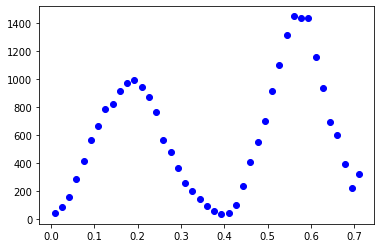

In [11]:
plt.plot(s1['limb_svariogram'].lags,s1['limb_svariogram'].variogram,'bo')

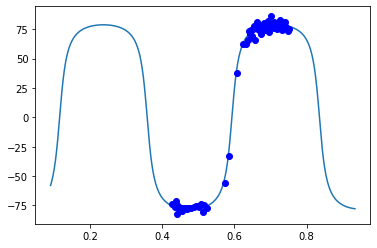

In [12]:
x = np.linspace(s1['feature'][0].min(),s1['feature'][0].max(),1000)
plt.plot(x,s0['fold'].fold_limb_rotation(x))
plt.plot(s0['foliation'],s0['limb_rotation'],'bo')

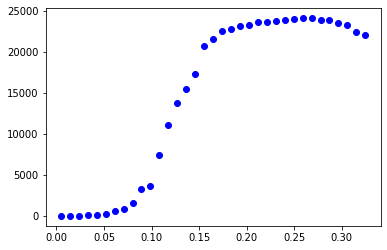

In [13]:
plt.plot(s0['limb_svariogram'].lags,s0['limb_svariogram'].variogram,'bo')